In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [ ]:
data=pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.shape

(150, 6)

In [ ]:
#missing values calumns wise
data.isnull().sum(axis=0).sort_values()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
#missing values row wise
data.isnull().sum(axis=1).sort_values()

,0
0,0
96,0
97,0
98,0
99,0
...,...
51,0
52,0
53,0
55,0


In [ ]:
# total no of NAN values in dataset
data.isnull().sum().sum()

0

visualization using iris dataset

Text(0, 0.5, 'y_axis')

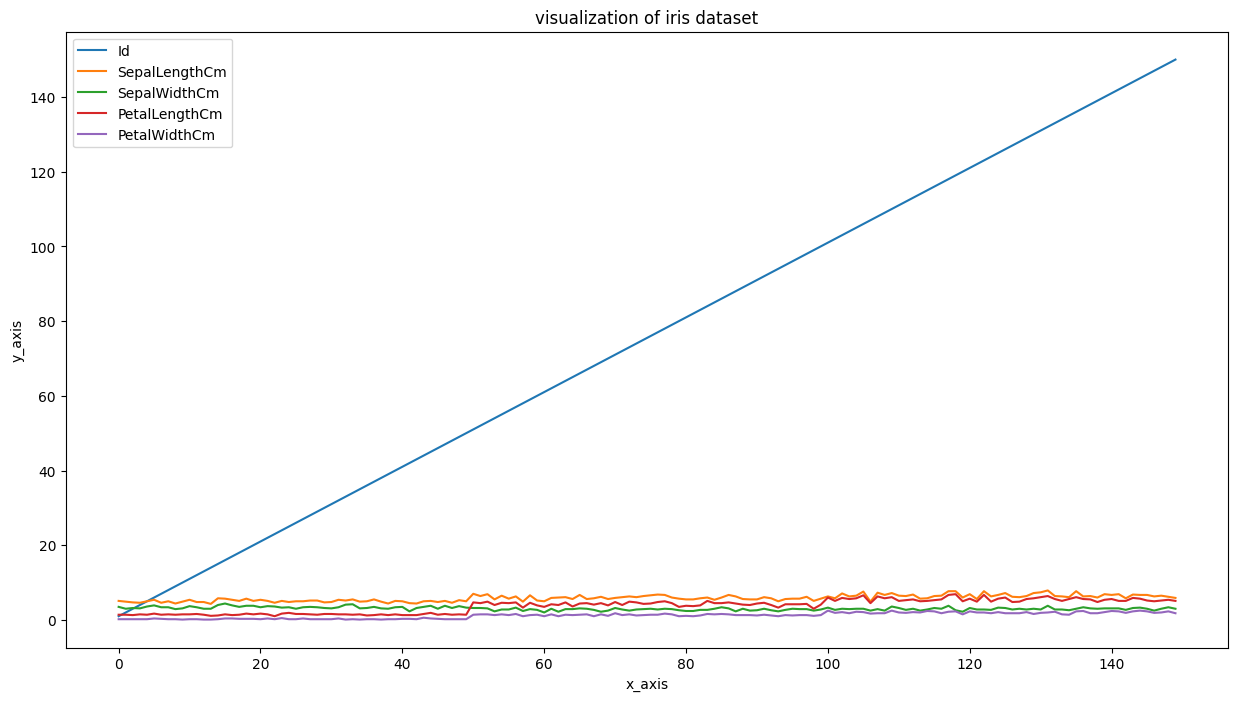

In [ ]:
ax=data.plot(figsize=(15,8),title='visualization of iris dataset')
ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')

<Axes: >

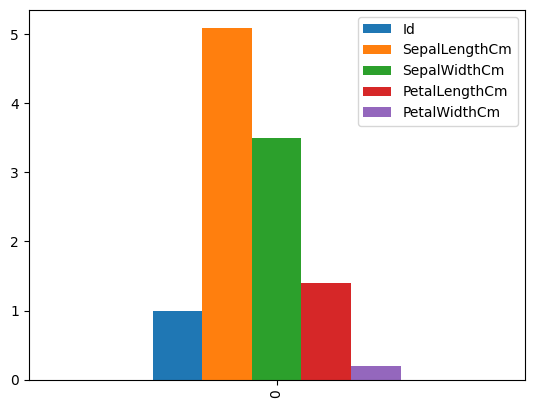

In [ ]:
data.iloc[0:1].plot(kind='bar')

Eleminate column in graph

In [ ]:
data1=data.drop(['Species'],axis=1)
data1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


<Axes: >

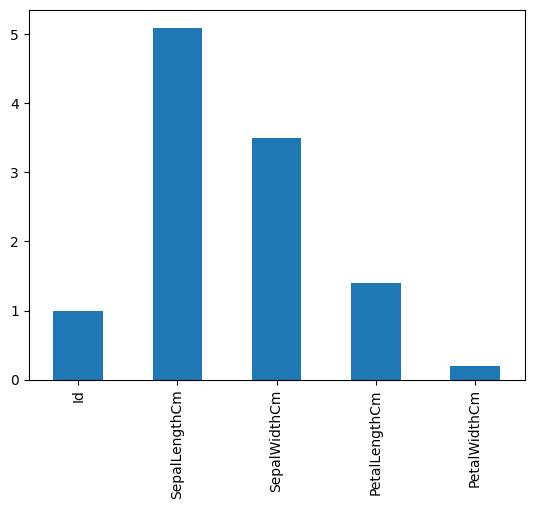

In [ ]:
data1.iloc[0].plot(kind='bar')

<Axes: ylabel='Frequency'>

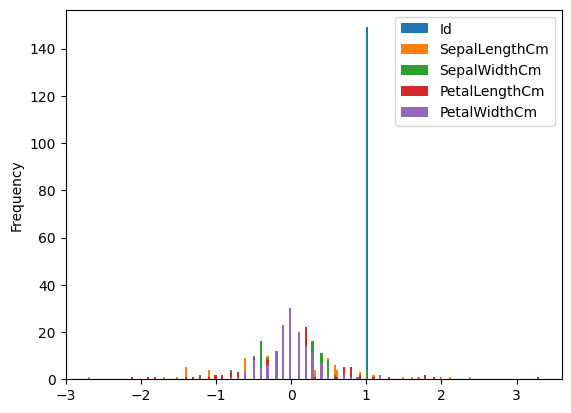

In [ ]:
data1.diff().plot(kind='hist',bins=200)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

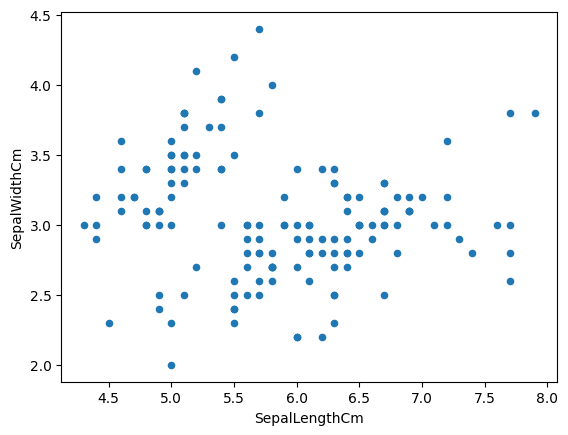

In [ ]:
data1.plot.scatter(x='SepalLengthCm',y='SepalWidthCm')

In [ ]:
#Divide the data into dependent and independent set
x=data.drop(columns=['Species'])
y=data['Species']

In [ ]:
#spilting the data into training and testing set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [ ]:
# by using knn for machine learning model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5) #where k=5

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict=knn.predict(x_test)

In [ ]:
#checking the accuracy with help of confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
ac=accuracy_score(y_test,y_predict)

In [ ]:
print(cm)
print(ac)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
1.0


#Now,we use another method for finding the accuracy


In [ ]:
# by using Decision tree for machine learning model
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [ ]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
tree_predict=tree.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,tree_predict)
ac=accuracy_score(y_test,tree_predict)

In [ ]:
print(cm)
print(ac)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
0.9666666666666667


Prediction on new dataset

In [ ]:
from operator import index
data_new={'SepalLengthCm':5,'SepalWidthCm':4,'PetalLengthCm':2.5,'PetalWidthCm':0.7}
index=[1]
new_data=pd.DataFrame(data_new,index)

In [ ]:
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,5,4,2.5,0.7


In [ ]:
new_predict=knn.predict(new_data)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Id
